# Blood Pressure

In a small dose-finding study of a blood pressure reducing drug, 40 high blood pressure patients (systolic blood pressure at least 150 mmHg) were randomised over 4 concentrations of the active compound (arginine) in the drug: 0, 2, 5 and 10 mg per day. The outcome is the systolic blood pressure reduction after 2 months, measured in mmHg.

NOTE: running this project in RSTUDIO would be much better

##0.	Data reading and calling libraries

In [82]:

library(ggplot2)
library(car)
library(car)
library(report)


load("BloodPressure.RData")
head(BloodPressure)

,dose,bp.reduction,gender
,<dbl>,<dbl>,<int>
1,0,3,0
2,0,5,0
3,0,-2,0
4,0,-5,1
5,0,0,0
6,0,5,0


##1.	Descriptive statistics

###1.1	Summarizing your data and calculate the following: mean, median, minimum, maximum, first and third quartile (for each variable).

In [83]:
summary(BloodPressure)

      dose        bp.reduction        gender    
 Min.   : 0.00   Min.   :-8.000   Min.   :0.00  
 1st Qu.: 1.50   1st Qu.: 2.750   1st Qu.:0.00  
 Median : 3.50   Median : 6.500   Median :0.00  
 Mean   : 4.25   Mean   : 7.625   Mean   :0.45  
 3rd Qu.: 6.25   3rd Qu.:13.000   3rd Qu.:1.00  
 Max.   :10.00   Max.   :26.000   Max.   :1.00  

In [84]:
mean(BloodPressure$bp.reduction)
median(BloodPressure$bp.reduction)
min(BloodPressure$bp.reduction)
max(BloodPressure$bp.reduction)


[1] 7.625

[1] 6.5

[1] -8

[1] 26

In [85]:
print("First and Second quantile")
quan <- quantile(BloodPressure$bp.reduction, c(0.25, 0.75))
quan

[1] "First and Second quantile"


25%   75% 
 2.75 13.00

###1.2  For the categorical variable (Gender)

In [86]:
BloodPressure$gender <- factor(BloodPressure$gender, labels = c("Female", "Male"))
table(BloodPressure$gender)

# Counting number of doses in the study using table()
table(BloodPressure$dose)


Female   Male 
    22     18 


 0  2  5 10 
10 10 10 10 

###1.3 Calculating the correlation of bp.reduction and dose


In [87]:
cor(BloodPressure$bp.reduction, BloodPressure$dose)

[1] 0.8594944

##2.	Graphics

###2.1	Generating a bar chart of a categorical variable for the gender.

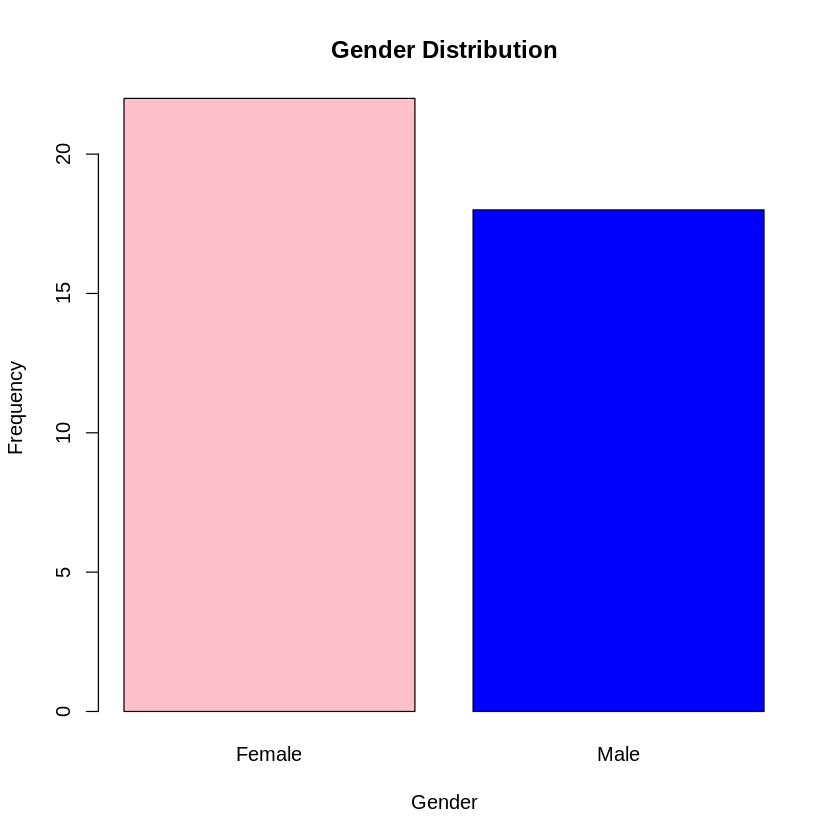

In [88]:
barplot(table(BloodPressure$gender), main = "Gender Distribution", xlab = "Gender", ylab = "Frequency",col=c("pink","blue"))

###2.2	Generating a bar chart graph with mean bp.reduction in  males and females


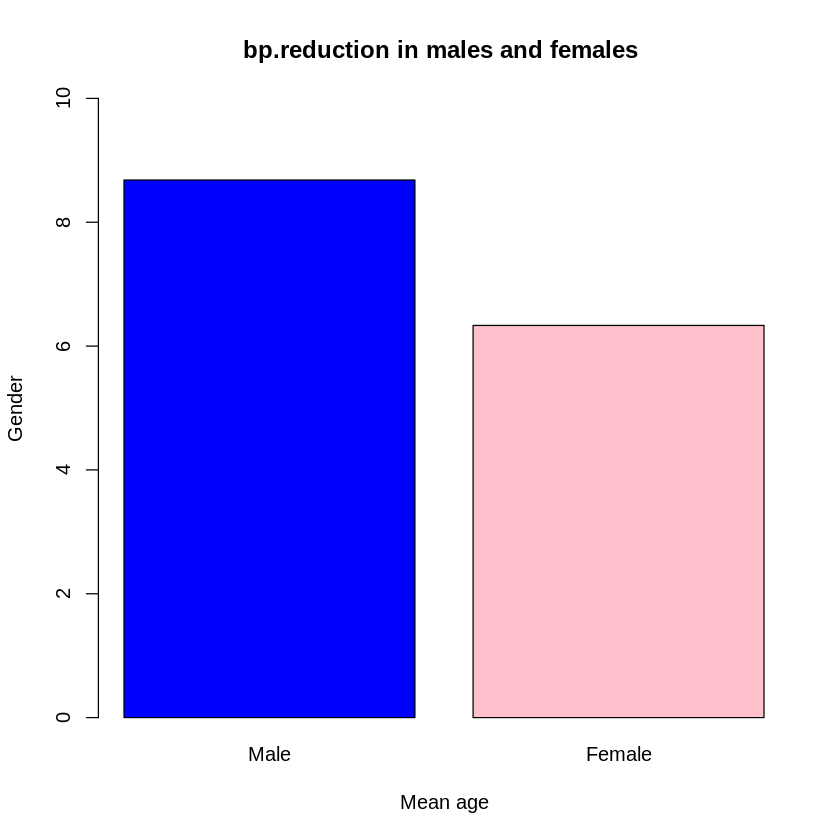

In [89]:
barplot(tapply(BloodPressure$bp.reduction, BloodPressure$gender, mean), main = "bp.reduction in males and females ", xlab = "Mean age", names = c("Male", "Female"), ylab = "Gender",col=c("blue","pink"),ylim=c(0,10))


###2.3	Making a histogram of a continuous variable “Dose”, “bp.reduction”.


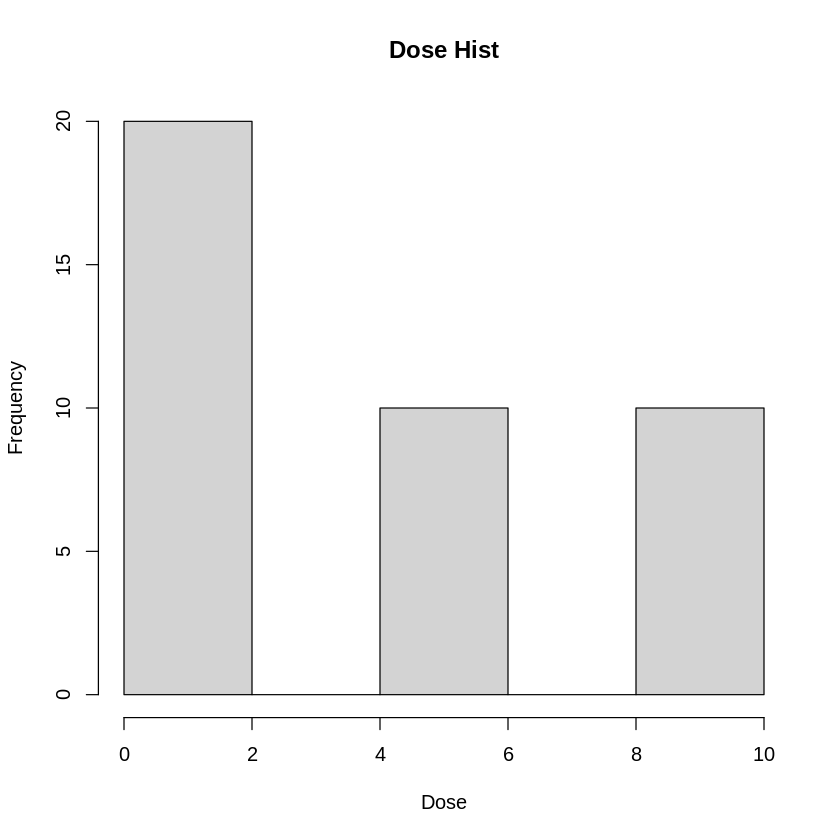

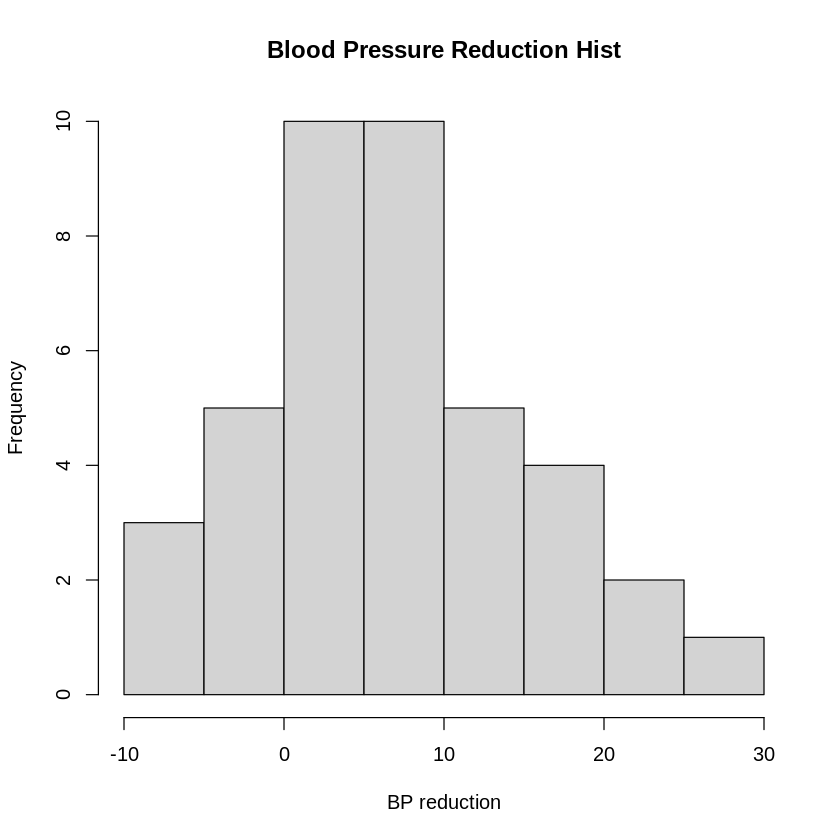

In [90]:
hist(BloodPressure$dose, main = "Dose Hist", xlab = "Dose")
hist(BloodPressure$bp.reduction, main = "Blood Pressure Reduction Hist", xlab = "BP reduction")

###2.4	Making a scatterplot of 2 continuous variables Dose and bp.reduction, and add the regression lines for each gender

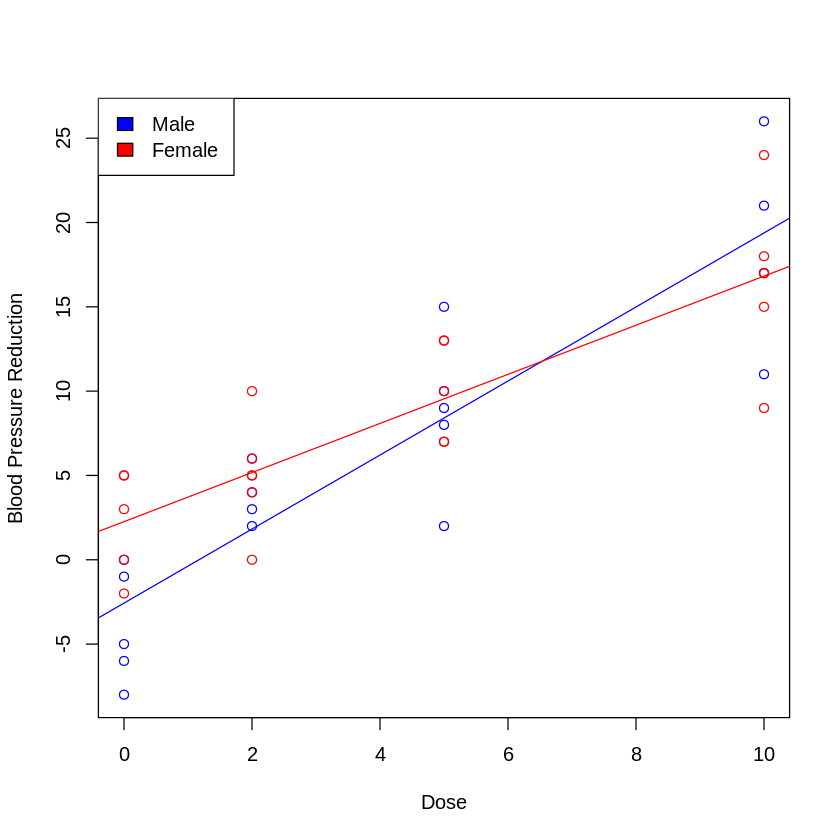

In [91]:
plot(bp.reduction[gender == "Male"]~ dose[gender == "Male"], data = BloodPressure, col= "blue", xlab = "Dose", ylab = "Blood Pressure Reduction")
points(bp.reduction[gender == "Female"]~ dose[gender == "Female"], data = BloodPressure, col = "red")
abline(lm(bp.reduction[gender == "Male"]~ dose[gender == "Male"], data = BloodPressure), col= "blue")
abline(lm(bp.reduction[gender == "Female"]~ dose[gender == "Female"], data = BloodPressure), col= "red")

legend("topleft", legend = c("Male", "Female"), fill = c("blue", "red"), cex = 1)

###2.5  Making a boxplot of bloodpressure reduction and a separate boxplots per Doses (as.factors).


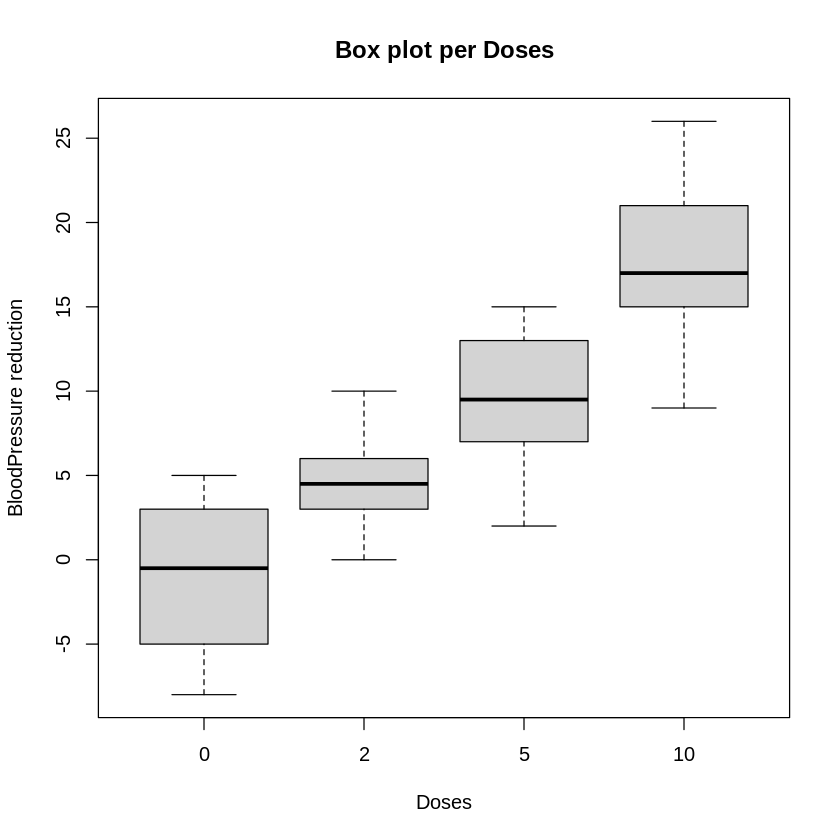

In [92]:
boxplot(BloodPressure$bp.reduction~as.factor(BloodPressure$dose), xlab = "Doses", ylab = "BloodPressure reduction", main = "Box plot per Doses")

##3.	Outlier detection

###3.1  Exploring the data for any existing outliers, identify them (do NOT remove them if found).


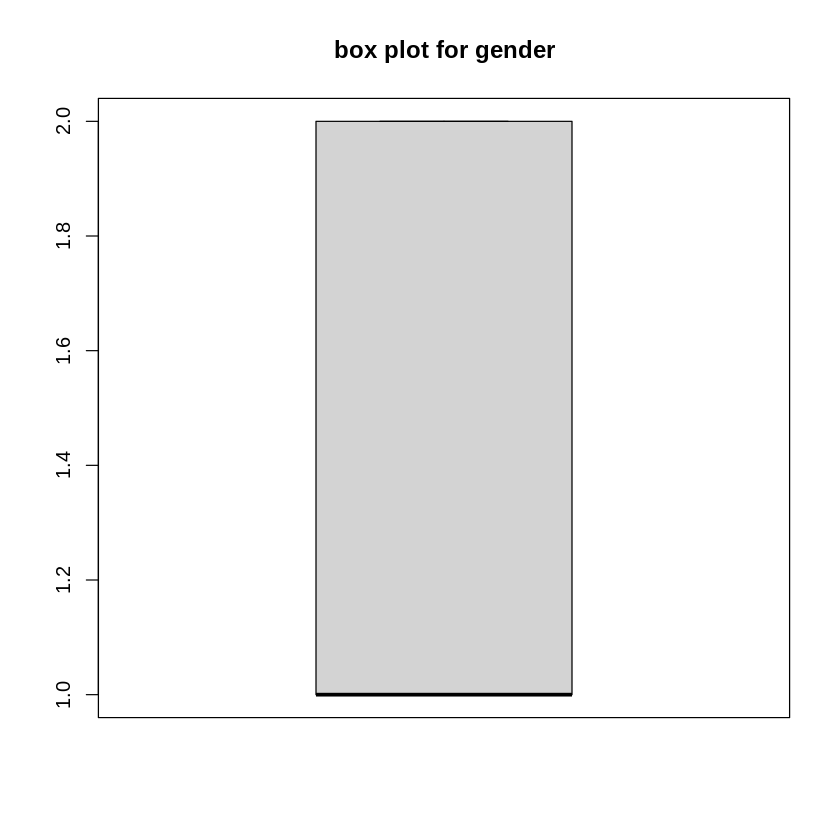

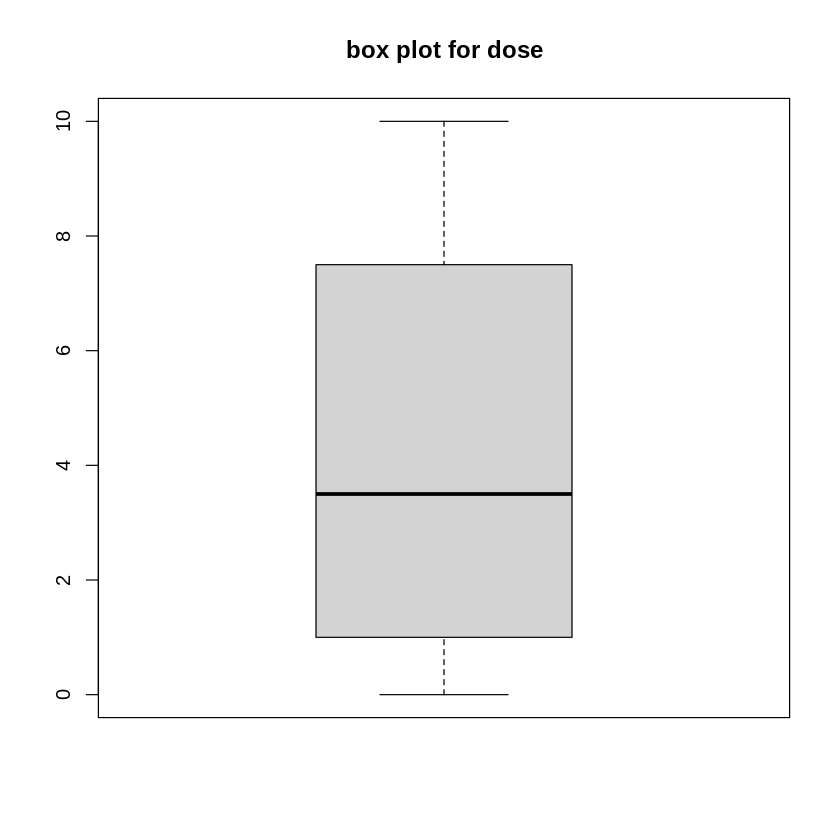

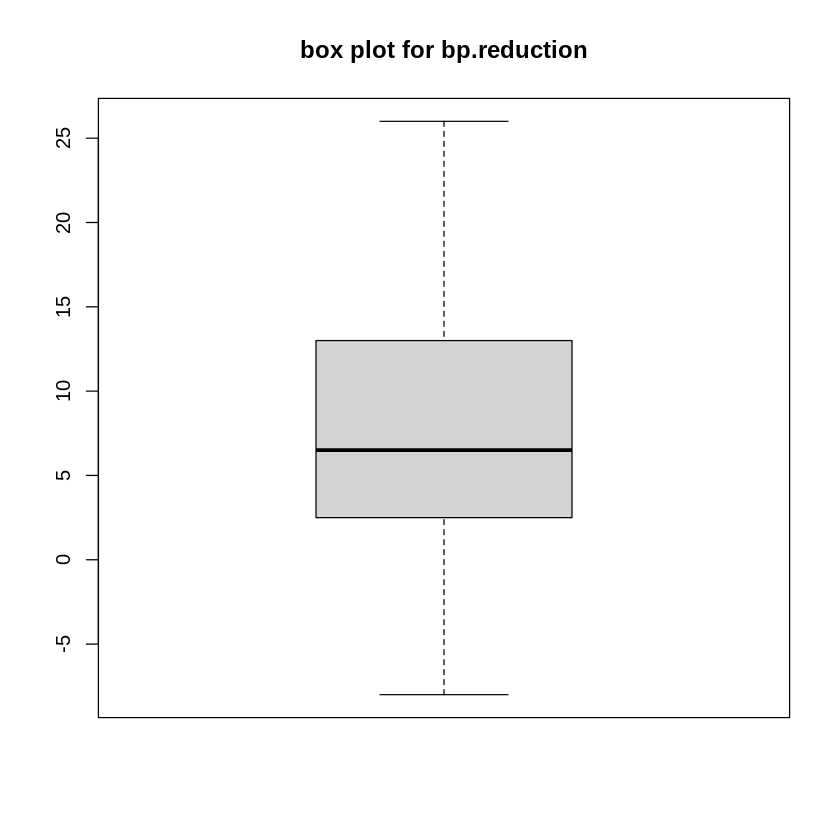

In [93]:
boxplot(BloodPressure$gender, main = "box plot for gender")
boxplot(BloodPressure$dose, main = "box plot for dose")
boxplot(BloodPressure$bp.reduction, main = "box plot for bp.reduction")

###3.2	What do you think?

There are no outliers, Which means that, within our dataset, there are no extreme or unusual values that stand out from the rest of the data. In other words, all the data points are relatively consistent and do not exhibit any remarkable deviations.

##4.	Testing for normality/ homoscedasticity

###4.1	Checking the normality using two methods


	Shapiro-Wilk normality test

data:  BloodPressure$bp.reduction
W = 0.98321, p-value = 0.806


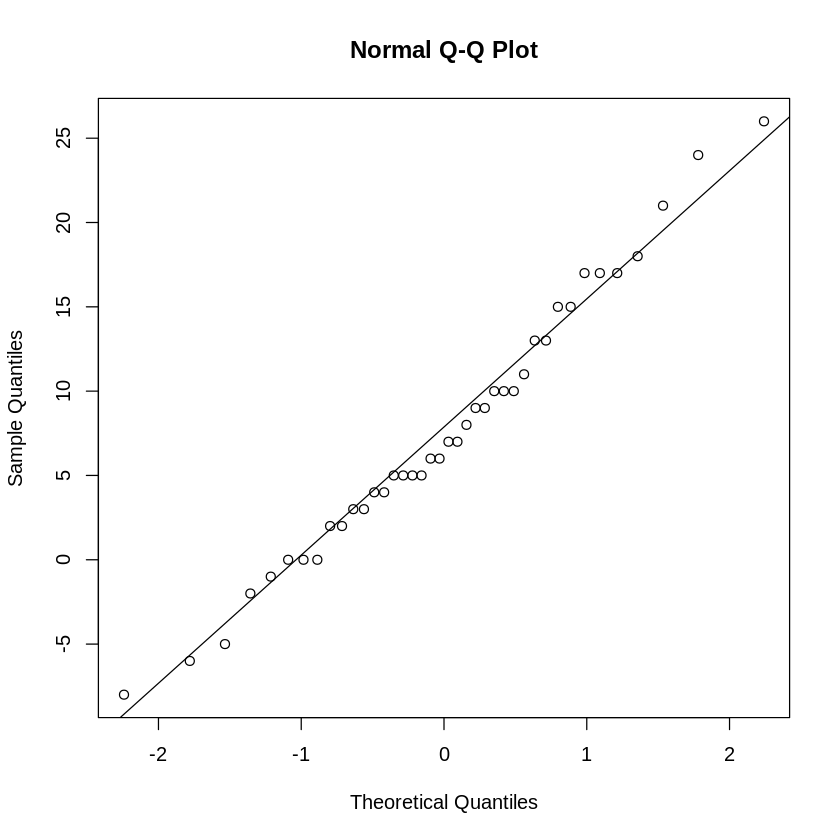

In [94]:
qqnorm(BloodPressure$bp.reduction)
qqline(BloodPressure$bp.reduction)

shapiro.test(BloodPressure$bp.reduction) #0.806
# there is no significant difference so we cannot reject the null hypothesis (normality)

###4.2	Checking the homoscedasticity using two methods.

In [95]:
leveneTest(BloodPressure$bp.reduction, BloodPressure$dose)

bartlett.test(BloodPressure$bp.reduction, BloodPressure$dose)
# there is no significant difference so we cannot reject the null hypothesis (homoscedasticity)

Warning message in leveneTest.default(BloodPressure$bp.reduction, BloodPressure$dose):
“BloodPressure$dose coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.9517159,0.425965
,36,NA,NA



	Bartlett test of homogeneity of variances

data:  BloodPressure$bp.reduction and BloodPressure$dose
Bartlett's K-squared = 3.9235, df = 3, p-value = 0.2698


###4.3	What do you think?



As in the qq plot or the shapiro test the data is normally distributed p value = 0.806.
Therefore, there is no significant difference, we dont have enough evidence to reject the null hypothosis
which is the normallity and according to bartlett test we cannot reject the null hypothesis(homoscedasticity)

##5.	Statistical Inference

###5.1	Calculating the 90%, 95%, 99% confidence interval for the means of bp.reduction per each Dose.


In [96]:
#90%
confint(lm(bp.reduction~dose, data = BloodPressure), level = 0.90)
#95%
confint(lm(bp.reduction~dose, data = BloodPressure))
#99%
confint(lm(bp.reduction~dose, data = BloodPressure), level = 0.99)


,5 %,95 %
(Intercept),-1.616965,1.683044
dose,1.495794,2.076893


,2.5 %,97.5 %
(Intercept),-1.948188,2.014267
dose,1.437469,2.135218


,0.5 %,99.5 %
(Intercept),-2.620699,2.686778
dose,1.319046,2.253641


###5.2	How would you describe those inferences and what do you observe in terms of the interval width when request higher confidence (i.e. 99% C.I.)?

Ans: •	A confidence interval is an estimated range of values that, with a given level of certainty, contain the real population parameter. As we request higher confidence intervals the intervals shrink and get more accurate.

##6.	Hypothesis testing

###6.1	We hypothesis that bp.reduction is different between male vs female (in the group that received placebo, i.e. Dose = 0).Assuming normality and homoscedasticity, can you test this hypothesis using statistical hypothesis framework

In [97]:
# Null hypothesis: bp.reduction is no different between male vs female (in the group that received placebo, i.e. Dose = 0)
# Alternative hypothesis: bp.reduction is different between male vs female (in the group that received placebo, i.e. Dose = 0)

t.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"], var.equal = T)


#	Assessing whether the previous assumptions have been meet for the test.

shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender=="Female"])
shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" & BloodPressure$gender=="Male"])

leveneTest(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])
bartlett.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])
var.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"]~BloodPressure$gender[BloodPressure$dose=="dose_0"])
# Ans: According to the p value = 0.01679 we can reject the null hypothesis therefore, there is a significant difference between males and females in dose = 0
# the assumption is correct

ERROR: ignored

###6.2	We hypothesis that bp.reduction is “higher” in the group receiving Dose = 10 compared to the control (Dose =0). Can you test this hypothesis assuming heteroscedasiticy

In [98]:

#Null hypothesis: there no differenece between blood pressure reduction taking dose 10 or dose 0 both are same
# Alternative hypothesis: bp.reduction is “higher” in the group receiving Dose = 10 compared to the control (Dose =0)

results <- t.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"], var.equal = F)
results
mean_diff <- results$estimate
# Print the mean difference
print(mean_diff)

#	Assessing the previous test assumption
shapiro.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])
shapiro.test( BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"])

leveneTest(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0" ], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])
var.test(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"])
bartlett.test(list(BloodPressure$bp.reduction[BloodPressure$dose == "dose_0"], BloodPressure$bp.reduction[BloodPressure$dose == "dose_10"]))
#	Our data is normal and homoscedastic, therefore, our assumption is wrong we should use (Two Sample T Test)

ERROR: ignored

###6.3	 We hypothesis that bp.reduction is different between the different doses (ignoring the gender). Can you perform comparison between the different groups, after assessing the assumptions and performing post-hoc testing.

In [99]:
# Null Hypothesis: bp.reduction is the same between the different doses
# Alternative Hypothesis: bp.reduction is different between the different doses

shapiro_test <- by(BloodPressure$bp.reduction, BloodPressure$dose, shapiro.test)
shapiro_test

levene_test <- leveneTest(bp.reduction ~ dose, data = BloodPressure)
levene_test

anov <- aov(bp.reduction ~ dose, data = BloodPressure)
report(anov)
anova_summary <- summary(anov)
SSE <- anova_summary$`Residuals`$SumSq
SSE
# Assuming you have an ANOVA summary stored in the 'anova_summary' object
SSR <- anova_summary$`Model`$SumSq
SSR
posthoc <- TukeyHSD(anov)
posthoc
plot(posthoc)
# After assessing that our data is normal and homoscedastic we perform posthoc (TuckeyHSD) as the output shows that there is a significant difference in all combinations except the dose_5 – dose_2 were its p value is greater than 0.05.
#Therefore, we have enough evidence to reject the null

BloodPressure$dose: 0

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94538, p-value = 0.6143

------------------------------------------------------------ 
BloodPressure$dose: 2

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95757, p-value = 0.7578

------------------------------------------------------------ 
BloodPressure$dose: 5

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95795, p-value = 0.7623

------------------------------------------------------------ 
BloodPressure$dose: 10

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95916, p-value = 0.7763


ERROR: ignored

##7.	Linear model

In [ ]:
#reseting our data reading
load("BloodPressure.RData")

#7.1	Fiting a linear regression to the data and interpret the regression coefficient (for the same hypotheses mentioned above)
res <- lm(bp.reduction ~ dose, BloodPressure)
report(res)

plot(BloodPressure$dose, BloodPressure$bp.reduction, ylab = "Blood Pressure Reduction", xlab = "Dose", col = "Blue")
abline(res)


###7.2	Calculating and interpret a 95% confidence interval of the regression slope

In [ ]:
# Extracting the coefficient summary
summary_coef <- summary(res)$coefficients
summary_coef
# Extracting the estimated slope and its standard error
slope <- summary_coef["dose", "Estimate"]
SEb <- summary_coef["dose", "Std. Error"]
# Calculating the t-value for the desired confidence level
t_value <- qt(0.975, df = res$df.residual)
t_value

# Calculating the confidence interval for the slope
lower_bound <- slope - t_value * SEb
upper_bound <- slope + t_value * SEb

# Printing the confidence interval
cat("95% Confidence Interval for the Regression Slope:", "\n")
cat("Lower Bound:", lower_bound, "\n")
cat("Upper Bound:", upper_bound, "\n")
#we have another way to calculate this easy than writing the equations
confint(res, 'dose', level=0.95)

###7.3	Estimating the average blood pressure reduction for patients that would receive 3mg/day of the medication.


In [ ]:
predict(res,newdata=data.frame(dose=3), interval="prediction",level=0.95)